In [3]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
reviews = pd.read_csv(r"C:\Users\S.Joshi\Desktop\Data Science\NLP\Amazon Reviews.csv")
pd.set_option('display.max_colwidth', 1000)
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me."
2,1,when I will get my 10% cash back.... its already 15 January..
3,1,Good
4,0,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon


In [5]:
import nltk
import string
stop_words = nltk.corpus.stopwords.words("english")

In [6]:
# Creating a user defined function
def clean_text(text):
    # Stripping white spaces before and after the text
    text = text.strip(" ")
    # Replacing multiple spaces with a single space
    text = re.sub("\s+"," ", text)
    # Replacing punctuations
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # Creating tokens
    tokens = re.split('\W+', text)
    return tokens

In [7]:
reviews['reviews1'] = reviews['review'].apply(lambda x: clean_text(x))

In [9]:
def rem_stopwords(text):
    rem_stp = [word for word in text if word not in stop_words]
    final_text = " ".join(rem_stp)
    return(final_text)
reviews['cleaned_reviews'] = reviews['reviews1'].apply(lambda x: rem_stopwords(x))
reviews.head()

,sentiment,review,reviews1,cleaned_reviews
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]",good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.","[worst, mobile, i, have, bought, ever, battery, is, draining, like, hell, backup, is, only, 6, to, 7, hours, with, internet, uses, even, if, i, put, mobile, idle, its, getting, dischargedthis, is, biggest, lie, from, amazon, lenove, which, is, not, at, all, expected, they, are, making, full, by, saying, that, battery, is, 4000mah, booster, charger, is, fake, it, takes, at, least, 4, to, 5, hours, to, be, fully, chargeddont, know, how, lenovo, will, survive, by, making, full, of, usplease, dont, go, for, this, else, you, will, regret, like, me]",worst mobile bought ever battery draining like hell backup 6 7 hours internet uses even put mobile idle getting dischargedthis biggest lie amazon lenove expected making full saying battery 4000mah booster charger fake takes least 4 5 hours fully chargeddont know lenovo survive making full usplease dont go else regret like
2,1,when I will get my 10% cash back.... its already 15 January..,"[when, i, will, get, my, 10, cash, back, its, already, 15, january]",get 10 cash back already 15 january
3,1,Good,[good],good
4,0,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon,"[the, worst, phone, everthey, have, changed, the, last, phone, but, the, problem, is, still, same, and, the, amazon, is, not, returning, the, phone, highly, disappointing, of, amazon]",worst phone everthey changed last phone problem still amazon returning phone highly disappointing amazon


# Creating a DTM

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(reviews['cleaned_reviews'])
dtm = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
dtm

,10,100,1000,1012,1015,1080p,10999,10k,11,11999,...,yellow,yes,yesterday,yet,youll,youre,youtube,zero,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DOCUMENT CLUSTERING

In [11]:
x = np.array(dtm)

In [12]:
from sklearn.cluster import KMeans
wcss = [] #to store the value of within sum of Squares or within cluster sum of squares
for i in range(1,11):
      #k-means++ Pick k-points in the dataset in random as the centeroid at the start of the algorithm
      #This will result in the fewer number of iterations for centeroids to become static
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #intertia_ gives the WCSS value

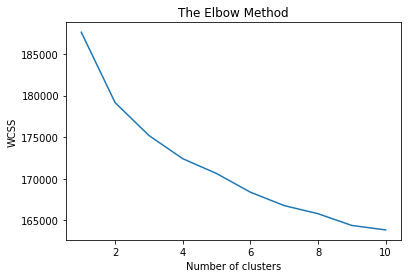

In [13]:
# Plotting Elbow plot to get the number of clusters
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# This Elbow plot shows that there must be 2 clusters

In [14]:
km = KMeans(n_clusters = 2, random_state = 0)
clusters = km.fit_predict(x)

In [15]:
cent = km.cluster_centers_
cent

array([[0.0091433 , 0.00437956, 0.00092201, ..., 0.00076834, 0.00107568,
        0.00046101],
       [0.04518072, 0.03433735, 0.00301205, ..., 0.00361446, 0.00301205,
        0.00120482]])

In [16]:
len(cent[1])

2000

- Number of terms in each cluster center will be equal to number of features in DTM. Here there are 2000 features in DTM so each cluster center will have 2000 values.
- These 2000 values denote the mean of the frequencies for each term in a particular cluster.
- The term with maximum mean frequency denotes that it is the dominating term in that particular cluster.

In [17]:
max_cluster1 = cent[0].max()
max_cluster1
# The index at which this maximum value is present, so the term at that index will be more dominating for first cluster

0.32447176334998296

In [18]:
ind_cluster1 = list(cent[0]).index(max_cluster1)
ind_cluster1
# The term at 751 index is the dominating term for cluster 1

751

In [19]:
list(dtm.columns)[751]
# Cluster 1 contains reviews having word 'good' as the dominating word

'good'

In [20]:
max_cluster2 = cent[1].max()
max_cluster2
# The index at which this maximum value is present, so the term at that index will be more dominating for first cluster

2.0481927710843424

In [21]:
ind_cluster2 = list(cent[1]).index(max_cluster2)
ind_cluster2
# The term at 1311 index is the dominating term for cluster 2

1311

In [22]:
list(dtm.columns)[1311]
# So cluster 2 contains reviews having word 'phone' as the dominating word

'phone'